<a href="https://colab.research.google.com/github/ttruong1000/MAT-494-Mathematical-Methods-for-Data-Science/blob/main/1_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.3 - Linear Regression**

### **1.3.0 - Python Libraries for Linear Regression**

The Python libraries used in linear algebra for computational purposes are NumPy, Sympy, SciPy, and MatPlotLib.

In [30]:
import numpy as np
import sympy as sp
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

### **1.3.1 - QR Decomposition**

##### Definition 1.3.1.1 - Rank of a Matrix

The rank of a matrix, denoted $\text{rank}(A)$, is the dimension of the row space of $A$.

##### Theorem 1.3.1.2 - Gram-Schmidt QR Factorization

If $A$ is an $m \times n$ matrix of rank $n$, then $A$ can be factored into a product $QR$, where $Q$ is an $m \times n$ matrix with orthonormal column vectors and $R$ is an upper triangular $n \times n$ matrix whose diagonal entries are all positive.

In [3]:
print('Example 1')
A = np.array([[1, -2, -1],[2, 0, 1],[2, -4, 2],[4, 0, 0]], dtype = float)
(Q, R) = np.linalg.qr(A)
print('Q =\n', Q)
print('R =\n', R)
print('A = QR =\n', np.dot(Q, R))
print('\nExample 2')
A = np.array([[1, -2, -2],[4, 3, 2],[1 , 2, 1]], dtype = float)
(Q, R) = np.linalg.qr(A)
print('Q =\n', Q)
print('R =\n', R)
print('A = QR =\n', np.dot(Q, R))
print('\nExample 3')
A = np.array([[-8, 6, -7],[-4, 0, 1],[-8 , 3, 2]], dtype = float)
(Q, R) = np.linalg.qr(A)
print('Q =\n', Q)
print('R =\n', R)
print('A = QR =\n', np.dot(Q, R))
print('\nExample 4')
A = np.array([[1, 3],[0, 1],[1, 0]], dtype = float)
(Q, R) = np.linalg.qr(A)
print('Q =\n', Q)
print('R =\n', R)
print('A = QR =\n', np.dot(Q, R))
print('\nExample 5')
A = np.array([[-9, 11],[-6, -2],[-18, 36]], dtype = float)
(Q, R) = np.linalg.qr(A)
print('Q =\n', Q)
print('R =\n', R)
print('A = QR =\n', np.dot(Q, R))
print('\nExample 6')
A = np.array([[-4, 1, 5],[-2, -4, 13],[-4, 10, 2]], dtype = float)
(Q, R) = np.linalg.qr(A)
print('Q =\n', Q)
print('R =\n', R)
print('A = QR =\n', np.dot(Q, R))
print('\nExample 7')
A = np.array([[2, 1],[1, 1],[2, 1]], dtype = float)
(Q, R) = np.linalg.qr(A)
print('Q =\n', Q)
print('R =\n', R)
print('A = QR =\n', np.dot(Q, R))

Example 1
Q =
 [[-0.2  0.4  0.8]
 [-0.4 -0.2 -0.4]
 [-0.4  0.8 -0.4]
 [-0.8 -0.4  0.2]]
R =
 [[-5.  2. -1.]
 [ 0. -4.  1.]
 [ 0.  0. -2.]]
A = QR =
 [[ 1.00000000e+00 -2.00000000e+00 -1.00000000e+00]
 [ 2.00000000e+00  2.44249065e-16  1.00000000e+00]
 [ 2.00000000e+00 -4.00000000e+00  2.00000000e+00]
 [ 4.00000000e+00  9.32587341e-16 -1.22124533e-16]]

Example 2
Q =
 [[-0.23570226  0.88888889  0.3928371 ]
 [-0.94280904 -0.11111111 -0.31426968]
 [-0.23570226 -0.44444444  0.86424162]]
R =
 [[-4.24264069 -2.82842712 -1.64991582]
 [ 0.         -3.         -2.44444444]
 [ 0.          0.         -0.54997194]]
A = QR =
 [[ 1. -2. -2.]
 [ 4.  3.  2.]
 [ 1.  2.  1.]]

Example 3
Q =
 [[-0.66666667  0.66666667 -0.33333333]
 [-0.33333333 -0.66666667 -0.66666667]
 [-0.66666667 -0.33333333  0.66666667]]
R =
 [[12. -6.  3.]
 [ 0.  3. -6.]
 [ 0.  0.  3.]]
A = QR =
 [[-8.00000000e+00  6.00000000e+00 -7.00000000e+00]
 [-4.00000000e+00 -1.48029737e-16  1.00000000e+00]
 [-8.00000000e+00  3.00000000e+00  2

### **1.3.2 - Least-Squares Problems**

##### Theorem 1.3.2.1 - Normal Equations

Let $A \in \mathbb{R}^{m \times n}$ be an $m \times n$ matrix with linearly independent columns. Let $\mathbf{b} \in \mathbb{R}^n$ be a vector. The solution to the least-squares problem
\begin{equation*}
  \min_{\mathbf{x} \in \mathbb{R}^m} ||A\mathbf{x} - \mathbf{b}||
\end{equation*}
satisfies
\begin{equation*}
  A^TA\mathbf{x} = A^T\mathbf{b}
\end{equation*}
which is known as the normal equations.

Alternatively, if $A$ is an $m \times n$ matrix of rank $n$, the normal equations
\begin{equation*}
  A^TA\mathbf{x} = A^T\mathbf{b}
\end{equation*}
has a unique solution
\begin{equation*}
  \hat{\mathbf{x}} = (A^TA)^{-1}A^T\mathbf{b}
\end{equation*}
and $\hat{\mathbf{x}}$ is the unique least squares solution of the system $A\mathbf{x} = \mathbf{b}$.

##### Definition 1.3.2.2 - Projection Vector and Projection Matrix

The projection vector
\begin{equation*}
  \mathbf{p} = A\hat{\mathbf{x}} = A(A^TA)^{-1}A^T\mathbf{b}
\end{equation*}
is the element in the row space of $A$, $R(A)$, that is closest to $\mathbf{b}$ in the least squares sense. The matrix $P = A(A^TA)^{-1}A^T$ is the projection matrix.

##### Theorem 1.3.2.3 - Least Squares via QR

Let $A \in \mathbb{R}^{m \times n}$ be an $m \times n$ matrix with linearly independent columns. Let $\mathbf{b} \in \mathbb{R}^n$ be a vector, and let $A = QR$ be a QR decomposition of $A$, where $Q$ is a $\mathbb{R}^{m \times n}$ matrix with $Q^TQ = I_{m \times n}$ and $R$ is upper triangular. The solution to the least-squares problem
\begin{equation*}
  \min_{\mathbf{x} \in \mathbb{R}^m} ||A\mathbf{x} - \mathbf{b}||
\end{equation*}
satisfies
\begin{equation*}
  R\mathbf{x} = Q^T\mathbf{b}
\end{equation*}

Alternatively, if $A$ is an $m \times n$ matrix of rank $n$, then the least squares solution of $A\mathbf{x} = \mathbf{b}$ is given by $\hat{\mathbf{x}} = R^{-1}Q^T\mathbf{b}$, where $Q$ and $R$ are the matrices obtained from the Gram-Schmidt QR Factorization [Theorem 1.3.1.2]. The solution $\hat{\mathbf{x}}$ may be obtained by using back substitution to solve $R\mathbf{x} = Q^T\mathbf{b}$.

##### Lemma 1.3.2.4 - Observations of Matrices in SVD

Let $A$ be an $m \times n$ matrix with a singular value decomposition $U\sum V^T$.
- The singular values $\sigma_1, \sigma_2, \ldots, \sigma_n$ of $A$ are unique; however, the matrices $U$ and $V$ are not unique.
- Since $V$ diagonalizes $A^TA$, it follows that the $\mathbf{v}_j$'s are eigenvectors of $A^TA$.
- Since $AA^T = U\sum\sum^TU^T$, it follows that $U$ diagonalizes $AA^T$ and that the $\mathbf{u}_j$'s are eigenvectors of $AA^T$.
- Comparing the $j$-th columns of each side of the euqation
\begin{equation*}
  AV = U\sum
\end{equation*}
we get
\begin{equation*}
  A\mathbf{v}_j = \sigma_j\mathbf{u}_j \quad j = 1, 2, \ldots, n
\end{equation*}
Similarly,
\begin{equation*}
  A^TU = V\left(\sum\right)^T
\end{equation*}
and hence
\begin{equation*}
  A\mathbf{u}_j = \sigma_j\mathbf{v}_j \quad j = 1, 2, \ldots, n
\end{equation*}
\begin{equation*}
  A\mathbf{u}_j = 0 \quad \text{ for } j = n + 1, n + 2, \ldots, m
\end{equation*}
The $\mathbf{v}_j$'s are called the right singular vectors of $A$, and the $\mathbf{u}_j$'s are called the left singular vectors of $A$.
- If $A$ has rank $r$, then
  - $\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_r$ form an orthonormal basis for the row space of $A^T$ $R(A^T)$.
  - $\mathbf{v}_{r + 1}, \mathbf{v}_{r + 2}2, \ldots, \mathbf{v}_n$ form an orthonormal basis for the null space of $A$ $N(A)$.
  - $\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_r$ form an orthonormal basis for the row space of $A$ $R(A)$.
  - $\mathbf{u}_{r + 1}, \mathbf{u}_{r + 2}, \ldots, \mathbf{u}_n$ form an orthonormal basis for the null space of $A^T$ $N(A^T)$.
- The rank of the matrix $A$ is equal to the number of its nonzero signular values,w here singular values are counted according to multiplicity.
- In the case that $A$ has rank $r < n$, if we set
\begin{equation*}
  U_1 = (\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_r) \quad V_1 = (\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_r)
\end{equation*}
and define $\sum_1$ as an $r \times r$ matrix with diagonal entries $\sigma_1, \sigma_2, \ldots, \sigma_r$. Then, $A = U_1\sum_1V_1^T$, which is the compact form of the singular value decomposition of $A$.

### **1.3.3 - Linear Regression**

Definition 1.3.3.1 - Relationships Between Linear Regression and Least Squares

Given a set of input data points $\{(\mathbf{x}_i, y_i)\}_{i = 1}^n$, with each $\mathbf{x}_i = (x_{i1}, x_{i2}, \ldots, x_{id})^T$, we seek an affine function (linear function and a translation) that fits the data. The common approach of finding this regression is to find coefficients $\beta_j$ for all $j \geq 0$, $j \in \mathbb{Z}$ that minimizes the least squares criterion
\begin{equation*}
  \sum_{i = 1}^n (y_i - \hat{y_i})^2
\end{equation*}
where
\begin{equation*}
  \hat{y_i} = \beta_0 + \sum_{j = 1}^d \beta_jx_{ij}
\end{equation*}
can be viewed as the predicted values of the linear model with coefficients of $\beta_j$ for all $j \geq 0$, $j \in \mathbb{Z}$. This minimization problem can be formulated in matrix form. Let
\begin{equation*}
  y = \begin{bmatrix}
           y_1 \\
           y_2 \\
           \vdots \\
           y_n
         \end{bmatrix}
  \quad
  A = \begin{bmatrix}
           1 & x_1^T \\
           1 & x_2^T \\
           \vdots & \vdots \\
           1 & x_n^T \\
         \end{bmatrix}
  \quad \text{ and } \quad
  \beta = \begin{bmatrix}
           \beta_0 \\
           \beta_1 \\
           \vdots \\
           \beta_n
         \end{bmatrix}
\end{equation*}
Then, the problem is transformed to finding
\begin{equation*}
  \min_\beta ||\mathbf{y} - A\beta||^2
\end{equation*}
which is a least-squares problem.

### **1.3.4 - Least Squares Linear Regression in Python**

Let $X = (x_1, x_2, \ldots, x_n)^T$ be a column vector of all of the inputs $x_i$, $1 \leq i \leq n$ for the data. Let $\hat{Y}$ be a column vector of all of the outputs $\hat{Y}_i = \hat{y}(x_i)$, $1 \leq i \leq n$, where
\begin{equation*}
  \hat{y}(x_1) = \alpha_1f_1(x_1) + \alpha_2f_2(x_1) + \cdots + \alpha_nf_n(x_1) \\
  \hat{y}(x_2) = \alpha_1f_1(x_2) + \alpha_2f_2(x_2) + \cdots + \alpha_nf_n(x_2) \\
  \cdot \\
  \cdot \\
  \cdot \\
  \hat{y}(x_n) = \alpha_1f_1(x_n) + \alpha_2f_2(x_n) + \cdots + \alpha_nf_n(x_n) \\
\end{equation*}
If the data is perfectly aligned (no noise/discrepancies in the data), the outputs would be
\begin{equation*}
  y(x_1) = \alpha_1f_1(x_1) + \alpha_2f_2(x_1) + \cdots + \alpha_nf_n(x_1) \\
  y(x_2) = \alpha_1f_1(x_2) + \alpha_2f_2(x_2) + \cdots + \alpha_nf_n(x_2) \\
  \cdot \\
  \cdot \\
  \cdot \\
  y(x_n) = \alpha_1f_1(x_n) + \alpha_2f_2(x_n) + \cdots + \alpha_nf_n(x_n) \\
\end{equation*}
and all of these output entries would be stored in a column vector $Y$, with $Y_i = y(x_i)$, $1 \leq i \leq n$. The coefficients of the least-squares linear regression would be the matrix solution to the matrix equation $Y = A\beta$ if the data was perfectly linear; however, pragmatically, this is usually not the case. Therefore, we can find a solution by finding the least squares regression coefficients
\begin{equation*}
  \beta = (A^TA)^{-1}A^TY
\end{equation*}

##### 1.3.4.1 - Using the Direct Inverse Method

We can directly evaluate $\beta = (A^TA)^{-1}A^TY$ directly and find the least squares regression linear equation, as shown below. The equation for the regression line is written as $Y_e = \alpha X + \beta$.

[[1.40150227]
 [1.02027244]]
y = 1.4015022681811227x + 1.0202724416289024


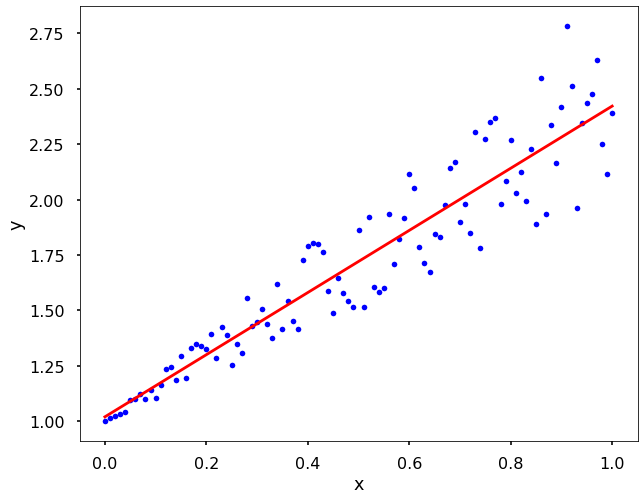

In [57]:
plt.style.use('seaborn-poster')
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)
print('y = {0}x + {1}'.format(alpha[0][0], alpha[1][0]))

# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##### 1.3.4.2 - Using the Moore-Penrose Inverse (Pseudoinverse)

Using $\beta = (A^TA)^{-1}A^TY$, we can directly evaluate the pseudoinverse (Moore-Penrose Inverse) $P = (A^TA)^{-1}A^T$ using the pinv function in NumPy and find the least squares regression linear equation, as shown below. The equation for the regression line is written as $Y_e = \alpha X + \beta$.

In [58]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)
print('y = {0}x + {1}'.format(alpha[0][0], alpha[1][0]))

[[1.40150227]
 [1.02027244]]
y = 1.4015022681811218x + 1.0202724416289024


##### 1.3.4.3 - Using the NumPy Least-Squares Function

NumPy has a Least Squares function which can directly be used to find the least squares regression linear equation, as shown below.

In [59]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)
print('y = {0}x + {1}'.format(alpha[0][0], alpha[1][0]))

[[1.40150227]
 [1.02027244]]
y = 1.4015022681811211x + 1.0202724416289026


##### 1.3.4.4 - Using the SciPy Optimize Curve Fit Function

The SciPy Optimize Curve Fit function can optimize not only linear equation, but nonlinear equations as well (e.g polynomial equations, exponential equations, logarithmic equations, etc.). The equation for the regression line is written as $Y_e = \alpha X + \beta$.

In [60]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)
print('y = {0}x + {1}'.format(alpha[0], alpha[1]))

[1.54760248 0.97702773]
y = 1.5476024759558x + 0.9770277285147838


##### 1.3.4.5 - Using Pandas

Using pandas, we can create a table of all of the arbitrary data created from the random number generator. To calculate the least squares linear regression equation coefficients $\alpha$, $\beta$ via the Ordinary Least Squares (OLS) regression method,
- calculate the mean of $A$ and $b$
- calculate the covariance of $A$ and $b$
- calculate the variance of $A$


The equation for the regression line is written as $Y_e = \alpha + \beta X$.

alpha = 2.0031670124623426
beta = 0.3229396867092763
y = 2.0031670124623426 + 0.3229396867092763x


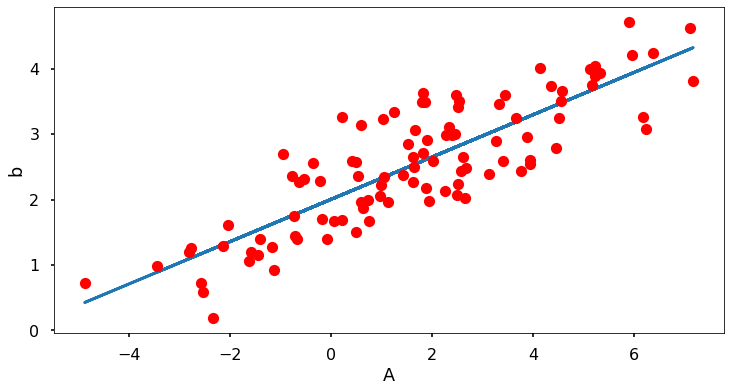

In [56]:
# Generate 'random' data
np.random.seed(0)
A = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
b = 2 + 0.3 * A + res                  # Actual values of b

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'A': A,
     'b': b}
)

# Show the first five rows of our dataframe
df.head()

# Calculate the mean of A and b
xmean = np.mean(A)
ymean = np.mean(b)

# Calculate the terms needed for the numator and denominator of beta
df['Abcov'] = (df['A'] - xmean) * (df['b'] - ymean)
df['Avar'] = (df['A'] - xmean)**2

# Calculate beta and alpha
beta = df['Abcov'].sum() / df['Avar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')
print('y = {0} + {1}x'.format(alpha, beta))

# Calculate ypred
ypred = alpha + beta * A

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(A, ypred)     # regression line
plt.plot(A, b, 'ro')   # scatter plot showing actual data
plt.xlabel('A')
plt.ylabel('b')

plt.show()

##### 1.3.4.6 - Using the Linear Regression Function from SciKitLearn

The linear regression function from SciKitLearn can be used to not only create linear regressions with one variable, but also multiple linear regressions with multiple variables.

alpha = 0.2369572541489049
beta = 4.968492508765532
y = 0.2369572541489049 + 4.968492508765532x


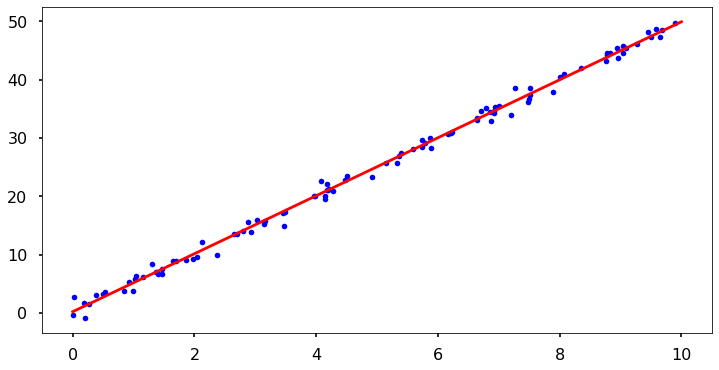

In [54]:
# Create random data with numpy:
rnstate = np.random.RandomState(1)
x = 10 * rnstate.rand(100)
y = 5 * x + rnstate.randn(100)

# Create a linear regression model based the positioning of the data and Intercept, and predict a Best Fit:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
print('alpha =', model.intercept_)
print('beta =', model.coef_[0])
print('y = {0} + {1}x'.format(model.intercept_, model.coef_[0]))

# Plot the estimated linear regression line with matplotlib:
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b.')
plt.plot(xfit, yfit, 'r')

plt.show()

### **1.3.5 - References**

1. MAT 494 Chapter 1 Lecture 1 Notes
2. Steven J. Leon, Linear Algebra with Applications, 9th Edition
3. https://pythonnumericalmethods.berkeley.edu/notebooks/chapter16.04-Least-Squares-Regression-in-Python.html
4. https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0